In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

### 4.1

In [3]:
maruti = pd.read_csv('Maruti_updated.csv', index_col='Unnamed: 0')
def call_label(df):
    if df['Close Price'] < df['Lower Bound']:
        return 'Buy'
    if (df['Close Price'] >= df['Lower Bound']) and (df['Close Price'] < df['Average']):
        return 'Hold Buy/ Liquidate Short'
    if (df['Close Price'] >= df['Average']) and (df['Close Price'] < df['Upper Bound']):
        return 'Hold Short/ Liquidate Buy'
    if df['Close Price'] >= df['Upper Bound']:
        return 'Short'
    return 'Other'

maruti['Call'] = maruti.apply(lambda maruti: call_label(maruti), axis=1)
maruti.Call.value_counts()

Hold Buy/ Liquidate Short    228
Hold Short/ Liquidate Buy    225
Short                         25
Buy                           16
Name: Call, dtype: int64

In [4]:
features = ['Close Price', 'Upper Bound', 'Lower Bound', 'Average']
x = maruti[features]
y = maruti['Call']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

#### Logistic Regression Model

In [5]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 4  2  0  0]
 [ 0 55  0  0]
 [ 0  1 52  0]
 [ 0  0  1  9]]
0.967741935483871


#### Decision Tree Classifier

In [6]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini', random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 2  3  1  0]
 [ 6 41  8  0]
 [ 0  6 47  0]
 [ 0  0 10  0]]
0.7258064516129032


#### K Nearest Neighbour Classifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 0  6  0  0]
 [ 0 52  3  0]
 [ 0  5 48  0]
 [ 0  0 10  0]]
0.8064516129032258


#### Random Forest Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 0  6  0  0]
 [ 0 49  6  0]
 [ 0  4 49  0]
 [ 0  0 10  0]]
0.7903225806451613


#### Naive Bayes Classifier

In [9]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 0  4  2  0]
 [ 0 22 33  0]
 [ 0 21 32  0]
 [ 0  6  4  0]]
0.43548387096774194


#### Kernel SVM Model

In [10]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 0  6  0  0]
 [ 0 54  1  0]
 [ 0  6 47  0]
 [ 0  0 10  0]]
0.8145161290322581


#### As we see the Logistic Regression model gives the highest accuracy. So we will use the Logistic Regression model to predict the values of daily Calls for the TCS stock.

In [11]:
tcs = pd.read_csv('TCS.csv')
tcs_roll_14 = tcs['Close Price'].rolling(14, min_periods=1).mean().fillna(0)
tcs_std_14 = tcs['Close Price'].rolling(14, min_periods=1).std().fillna(0)
upper = tcs_roll_14 + 2*tcs_std_14
lower = tcs_roll_14 - 2*tcs_std_14
tcs['Upper Bound'] = upper
tcs['Lower Bound'] = lower
tcs['Average'] = tcs_roll_14
features = ['Close Price', 'Upper Bound', 'Lower Bound', 'Average']
x1 = tcs[features]
tcs['Call'] = logreg.predict(x1)
tcs.Call.value_counts()

Hold Short/ Liquidate Buy    280
Hold Buy/ Liquidate Short    185
Short                         20
Buy                           13
Name: Call, dtype: int64

### 4.2

In [12]:
hero = pd.read_csv('HEROMOTOCO.csv')
hero['%_change_OpenClose'] = ((hero['Close Price'] - hero['Open Price'])/hero['Open Price'])*100
hero['%_change_LowHigh'] = ((hero['High Price'] - hero['Low Price'])/hero['Low Price'])*100
hero['5_day_mean'] = hero['Close Price'].pct_change().fillna(0).rolling(5, min_periods=1).mean().fillna(0)
hero['5_day_std'] = hero['Close Price'].pct_change().fillna(0).rolling(5, min_periods=1).std().fillna(0)
hero

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%_change_OpenClose,%_change_LowHigh,5_day_mean,5_day_std
0,HEROMOTOCO,EQ,15-May-2017,3541.50,3541.0,3558.00,3504.60,3518.00,3515.45,3519.65,215587,7.587906e+08,17129,110769,51.38,-0.721548,1.523712,0.000000,0.000000
1,HEROMOTOCO,EQ,16-May-2017,3515.45,3529.5,3631.80,3491.10,3623.00,3619.40,3561.42,372398,1.326266e+09,33654,147610,39.64,2.547103,4.030248,0.014785,0.020909
2,HEROMOTOCO,EQ,17-May-2017,3619.40,3615.0,3683.95,3595.05,3634.10,3645.95,3651.06,338342,1.235308e+09,27003,160855,47.54,0.856155,2.472845,0.012302,0.015398
3,HEROMOTOCO,EQ,18-May-2017,3645.95,3600.0,3639.00,3577.05,3586.00,3592.05,3602.46,294013,1.059170e+09,23822,143430,48.78,-0.220833,1.731874,0.005530,0.018479
4,HEROMOTOCO,EQ,19-May-2017,3592.05,3597.0,3656.00,3533.75,3565.00,3571.65,3593.06,270446,9.717284e+08,26291,113208,41.86,-0.704754,3.459498,0.003288,0.016770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,HEROMOTOCO,EQ,07-May-2019,2531.30,2567.9,2568.00,2521.50,2529.00,2527.35,2546.23,347427,8.846276e+08,29584,129747,37.35,-1.579111,1.844140,-0.005801,0.019645
490,HEROMOTOCO,EQ,08-May-2019,2527.35,2525.8,2540.85,2481.60,2496.00,2499.70,2515.26,406025,1.021259e+09,32136,176406,43.45,-1.033336,2.387573,-0.000912,0.011991
491,HEROMOTOCO,EQ,09-May-2019,2499.70,2499.0,2555.00,2490.60,2540.00,2537.75,2536.33,585480,1.484972e+09,40511,203100,34.69,1.550620,2.585722,-0.001040,0.011768
492,HEROMOTOCO,EQ,10-May-2019,2537.75,2535.0,2560.00,2500.05,2506.05,2507.30,2529.09,332771,8.416086e+08,23272,118956,35.75,-1.092702,2.397952,-0.004514,0.011965


In [13]:
cp = list(hero['Close Price'])
a = []
for i in range(0, 493):
    if cp[i+1] > cp[i]:
        a.append(1)
    else:
        a.append(-1)
hero['Action'] = pd.DataFrame(a)
hero.dropna(inplace=True)
hero

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%_change_OpenClose,%_change_LowHigh,5_day_mean,5_day_std,Action
0,HEROMOTOCO,EQ,15-May-2017,3541.50,3541.0,3558.00,3504.60,3518.00,3515.45,3519.65,215587,7.587906e+08,17129,110769,51.38,-0.721548,1.523712,0.000000,0.000000,1.0
1,HEROMOTOCO,EQ,16-May-2017,3515.45,3529.5,3631.80,3491.10,3623.00,3619.40,3561.42,372398,1.326266e+09,33654,147610,39.64,2.547103,4.030248,0.014785,0.020909,1.0
2,HEROMOTOCO,EQ,17-May-2017,3619.40,3615.0,3683.95,3595.05,3634.10,3645.95,3651.06,338342,1.235308e+09,27003,160855,47.54,0.856155,2.472845,0.012302,0.015398,-1.0
3,HEROMOTOCO,EQ,18-May-2017,3645.95,3600.0,3639.00,3577.05,3586.00,3592.05,3602.46,294013,1.059170e+09,23822,143430,48.78,-0.220833,1.731874,0.005530,0.018479,-1.0
4,HEROMOTOCO,EQ,19-May-2017,3592.05,3597.0,3656.00,3533.75,3565.00,3571.65,3593.06,270446,9.717284e+08,26291,113208,41.86,-0.704754,3.459498,0.003288,0.016770,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,HEROMOTOCO,EQ,06-May-2019,2565.40,2540.0,2563.00,2525.10,2530.20,2531.30,2541.08,463670,1.178225e+09,28592,258224,55.69,-0.342520,1.500931,-0.006121,0.019571,-1.0
489,HEROMOTOCO,EQ,07-May-2019,2531.30,2567.9,2568.00,2521.50,2529.00,2527.35,2546.23,347427,8.846276e+08,29584,129747,37.35,-1.579111,1.844140,-0.005801,0.019645,-1.0
490,HEROMOTOCO,EQ,08-May-2019,2527.35,2525.8,2540.85,2481.60,2496.00,2499.70,2515.26,406025,1.021259e+09,32136,176406,43.45,-1.033336,2.387573,-0.000912,0.011991,1.0
491,HEROMOTOCO,EQ,09-May-2019,2499.70,2499.0,2555.00,2490.60,2540.00,2537.75,2536.33,585480,1.484972e+09,40511,203100,34.69,1.550620,2.585722,-0.001040,0.011768,-1.0


In [14]:
features = ['%_change_OpenClose', '%_change_LowHigh', '5_day_mean', '5_day_std']
x = hero[features]
y = hero['Action']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
rf = RandomForestClassifier(n_estimators=100, max_depth=1, random_state=0)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.5806451612903226


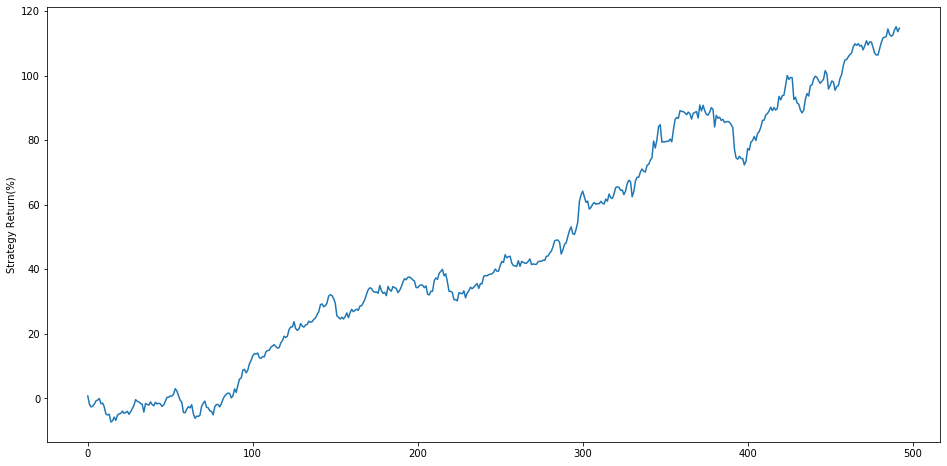

In [17]:
hero['Net_cummulative_returns'] = (((hero['Open Price'] - hero['Close Price'])/hero['Open Price'])*100).cumsum()
plt.figure(figsize=(16, 8))
plt.plot(hero['Net_cummulative_returns'])
plt.ylabel("Strategy Return(%)")
plt.show()